# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_mouse_results = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

# Display the data table for preview
print(data_mouse_results)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [101]:
# Checking the number of mice.
unique_mice_count = data_mouse_results['Mouse ID'].nunique()
print(f"Cantidad de identificadores de ratones únicos: {unique_mice_count}")

Cantidad de identificadores de ratones únicos: 249


In [102]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_timepoints = data_mouse_results[data_mouse_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
if not duplicated_timepoints.empty:
    print("Identificador de ratón con puntos de tiempo duplicados:")
    print(duplicated_timepoints)


Identificador de ratón con puntos de tiempo duplicados:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.78

In [103]:
# Optional: Get all the data for the duplicate mouse ID.


In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_mouse_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
print("DataFrame limpio sin puntos de tiempo duplicados:")
print(clean_data)


DataFrame limpio sin puntos de tiempo duplicados:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1      

In [105]:
# Checking the number of mice in the clean DataFrame.
unique_ID_mouse = clean_data['Mouse ID'].nunique()
print(f"Cantidad de identificadores de ratones únicos: {unique_ID_mouse}")

Cantidad de identificadores de ratones únicos: 249


## Summary Statistics

In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calcular las estadísticas resumidas
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Renombrar las columnas para reflejar las estadísticas calculadas
summary_stats.columns = ['Media', 'Mediana', 'Varianza', 'Desviación Estándar', 'SEM']
print(summary_stats)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


                  Media    Mediana   Varianza  Desviación Estándar       SEM
Drug Regimen                                                                
Capomulin     40.675741  41.557809  24.947764             4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177             6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684             6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577             8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479             8.134708  0.596466
Placebo       54.033581  52.288934  61.168083             7.821003  0.581331
Propriva      52.393463  50.909965  43.138803             6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704             4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562             7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355             6.966589  0.516398


In [108]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

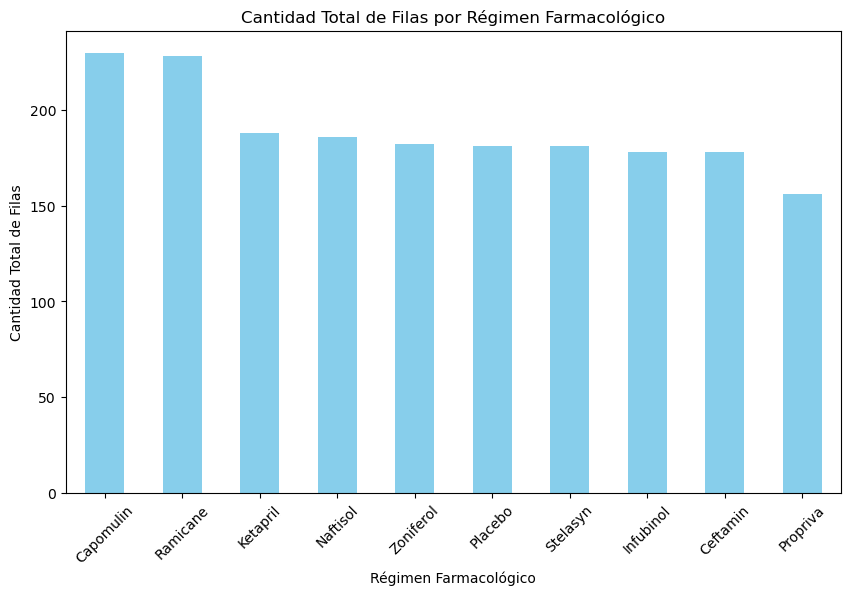

In [110]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = clean_data['Drug Regimen'].value_counts()
bar_data.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Cantidad Total de Filas por Régimen Farmacológico')
plt.xlabel('Régimen Farmacológico')
plt.ylabel('Cantidad Total de Filas')
plt.xticks(rotation=45)
plt.show()

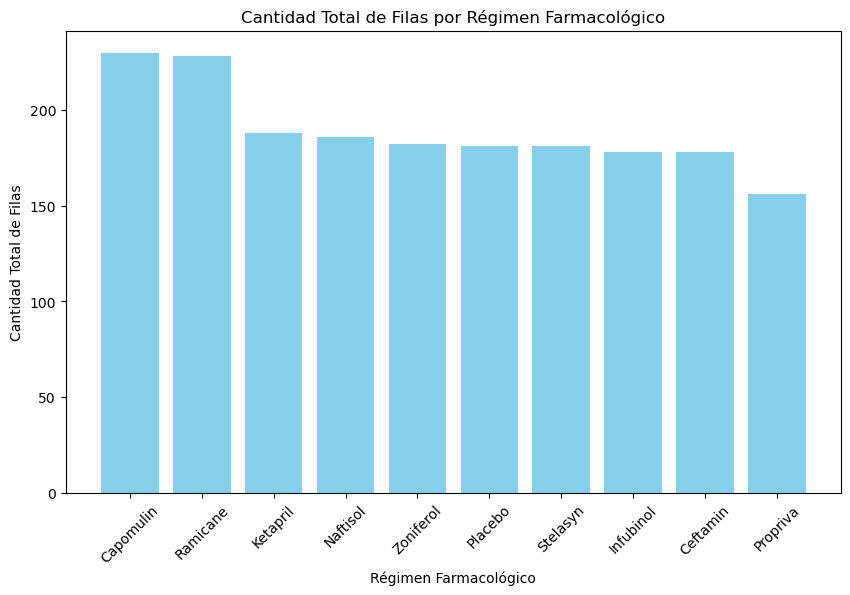

In [111]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_data = clean_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(bar_data.index, bar_data.values, color='skyblue')
plt.title('Cantidad Total de Filas por Régimen Farmacológico')
plt.xlabel('Régimen Farmacológico')
plt.ylabel('Cantidad Total de Filas')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

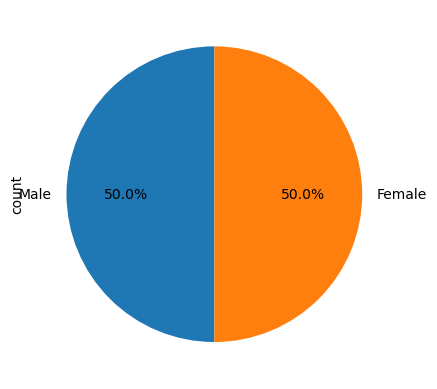

In [112]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
data = {'Sex': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
        'Mouse ID': ['A1', 'B2', 'C3', 'D4', 'E5', 'F6']}
df = pd.DataFrame(data)
# Get the unique mice with their gender
gender_distribution = df['Sex'].value_counts()

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90)

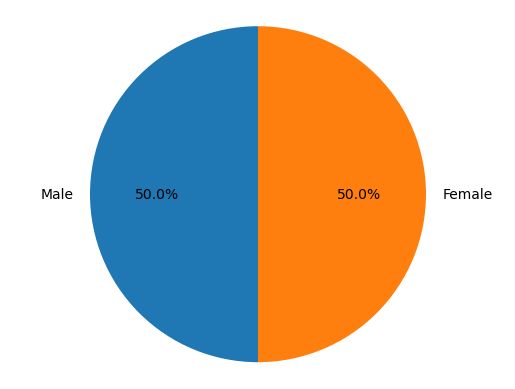

In [113]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_distribution = df['Sex'].value_counts()
# Get the unique mice with their gender

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Para que el gráfico sea un círculo en lugar de una elipse
plt.show()



## Quartiles, Outliers and Boxplots

In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
selected_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = []

# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint_df = clean_data.loc[clean_data.groupby('Mouse ID')['Timepoint'].idxmax()]

# Start by getting the last (greatest) timepoint for each mouse
merged_data = pd.merge(clean_data, max_timepoint_df[['Mouse ID', 'Timepoint']], on=['Mouse ID', 'Timepoint'], how='inner')


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
for drug in selected_drugs:
   tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
   final_tumor_volumes.extend(tumor_volumes)

 #e quarty
quartiles = pd.Series(final_tumor_volumes).quantile([0.25, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
#
lower_bound = lowerq - 1.5 * iqr
upper_bound = upperq + 1.5 * iqr
#
outliers = [volume for volume in final_tumor_volumes if volume < lower_bound or volume > upper_bound]
#
print(f"Los cuartiles son: {quartiles}")
print(f"El rango intercuartílico (RIQ) es: {iqr}")
print(f"Los posibles valores atípicos son: {outliers}")

Los cuartiles son: 0.25    37.187744
0.75    59.930262
dtype: float64
El rango intercuartílico (RIQ) es: 22.742517952499995
Los posibles valores atípicos son: []


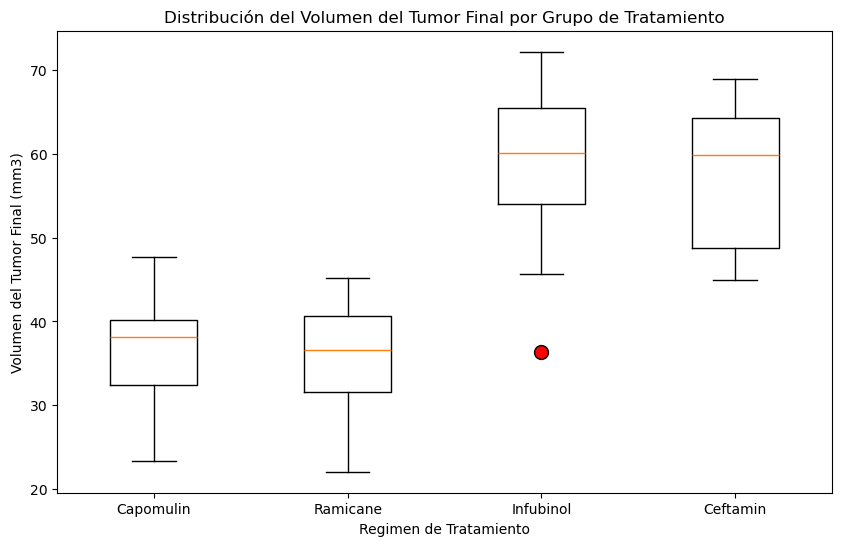

In [116]:
data_dict = {drug: merged_data.loc[merged_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] for drug in selected_drugs}
# 

plt.figure(figsize=(10, 6))
plt.boxplot(data_dict.values(), labels=data_dict.keys(), flierprops=dict(marker='o', markerfacecolor='r', markersize=10))

# Cr
plt.xlabel('Regimen de Tratamiento')
plt.ylabel('Volumen del Tumor Final (mm3)')
plt.title('Distribución del Volumen del Tumor Final por Grupo de Tratamiento')

# Calcul
plt.show()

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [117]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

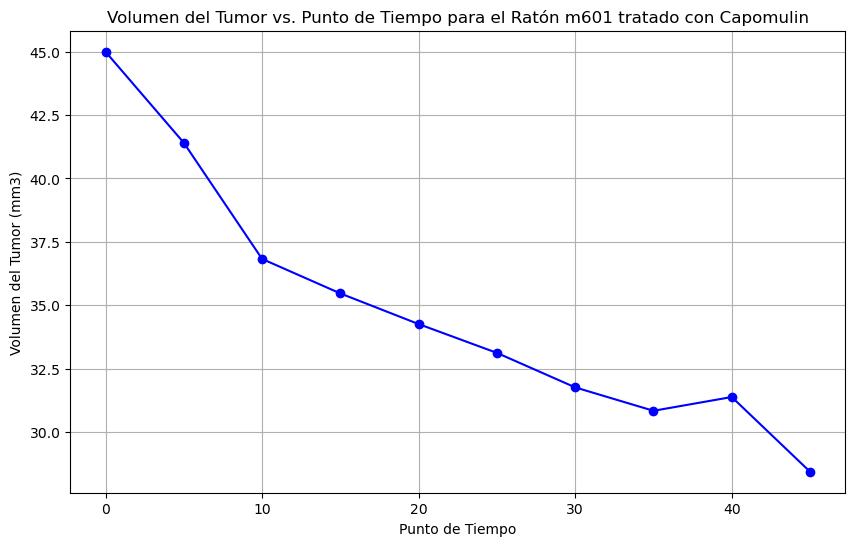

In [146]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'm601'
mouse_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]
#
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
# 
plt.xlabel('Punto de Tiempo')
plt.ylabel('Volumen del Tumor (mm3)')
plt.title(f'Volumen del Tumor vs. Punto de Tiempo para el Ratón {mouse_id} tratado con Capomulin')
#
plt.grid(True)
plt.show()

In [120]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#

## Correlation and Regression

In [122]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
